## Analyze A/B Test Results
### Brian Allan Woodcock
### Course: "Practical Statistics" as part of Udacity's _Data Analyst Nanodegree Program_

**Note**: This project was a guided exercise where a template file with prompts was provided.

***

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

***   
`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

***   
**a**. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


***   
**b**. Use the below cell to find the number of rows in the dataset.

In [3]:
print('The number of rows in the data set is: {}'.format(df.shape[0]))

The number of rows in the data set is: 294478


***   
**c**. The number of unique users in the dataset.

In [4]:
num_unique_users = df.user_id.nunique()
print('The number of unique users in the dataset is: {}'.format(num_unique_users))

The number of unique users in the dataset is: 290584


***   
**d**. The proportion of users converted.

In [5]:
prop_converted = df.query('converted == 1').user_id.nunique() / num_unique_users
print('The proportion of unique users in the dataset who converted is: {}'.format(round(prop_converted, 5)))

The proportion of unique users in the dataset who converted is: 0.12104


***   
**e**. The number of times the `new_page` and `treatment` don't line up.

In [6]:
num_mismatches = ((df.group == 'treatment') != (df.landing_page == 'new_page')).sum()
print('The number of times \'new_page\' did not line up with \'treatment\' is: {}'.format(num_mismatches))

The number of times 'new_page' did not line up with 'treatment' is: 3893


***   
**f**. Do any of the rows have missing values?

In [7]:
num_missing_val = df.isnull().any(axis = 1).sum()
print('The number of rows with missing values is: {}'.format(num_missing_val))

The number of rows with missing values is: 0


***   
`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

***   
**a**. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Create new dataset, dropping all mismatches between 'treatment' and 'new_page'
df2 = df.query('(group == "treatment") == (landing_page == "new_page")')
df2.shape[0]

290585

**Note**: Notice that the size of this new dataframe, df2, is 1 larger than the number of unique users (290584) that we had in the original data set.  This implies that repeat users remain in the new data set.

In [9]:
# Check: total rows in original dataset - number of mismatches = length of df2
df.shape[0] - num_mismatches == df2.shape[0]

True

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

***   
`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

***   
**a**. How many unique **user_id**s are in **df2**?

In [11]:
n_tot = df2.user_id.nunique()
print('The number of unique users in df2 is: {}'.format(n_tot))

The number of unique users in df2 is: 290584


**Note**: This is the same number of unique users that we started with in the original data set.  Since the size of this new data set, df2, is one greater than this, it also implies that there is one repeated user_id.

***   
**b**. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
repeat_user = df2[df2.duplicated('user_id', keep=False)]
repeat_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
# Get the index values for the rows
repeat_user.index

Int64Index([1899, 2893], dtype='int64')

In [14]:
# Use an index value to obtain the repeated user_id
dup_id = repeat_user.at[repeat_user.index[0], 'user_id']
print('The repeated user_id is: {}'.format(dup_id))

The repeated user_id is: 773192


***   
**c**. What is the row information for the repeat **user_id**? 

In [15]:
repeat_user

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


***   
**d**. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Dropping the last row of the repeated user
df2 = df2.drop_duplicates(subset='user_id', keep='first')

In [17]:
# Check that it was dropped
df2[df2['user_id'] == dup_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [18]:
# Check that df2 only contains unique user_ids
len(df2) == df.user_id.nunique()

True

**Note**: At this point df2 is our clean data set, cleaned of testing mismatches and repeated user_ids.

***   
`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

***   
**a**. What is the probability of an individual converting regardless of the page they receive?

In [19]:
round(df2.converted.mean(), 5)

0.1196

***   
**b**. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
obs_control_convert_rate = df2.query('group == "control"').converted.mean()
round(obs_control_convert_rate, 5)

0.12039

***   
**c**. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
obs_treatment_convert_rate = df2.query('group == "treatment"').converted.mean()
round(obs_treatment_convert_rate, 5)

0.11881

In [22]:
obs_diff = obs_treatment_convert_rate - obs_control_convert_rate
print('The observed difference in conversion rates between\n \
the treatment and the control groups is: {}'.format(obs_diff))

The observed difference in conversion rates between
 the treatment and the control groups is: -0.0015782389853555567


***   
**d**. What is the probability that an individual received the new page?

In [23]:
round((df2['landing_page'] == 'new_page').mean(), 5)

0.50006

***   
**e**. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**ANSWER**   
Given that the treatment and the control groups are of roughly equal sizes and the total number of samples is quite large (= 290,584), it seems safe to trust the estimate proportions calculated above.  So, since the estimate proportion for the control group was 12.04% and for the treatment group 11.88%, **it appears that** the new landing page for the treatment group **did not result in a significant improvement** in conversions.  If anything, it appears that the treatment had a negative impact on conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


***   
`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**  
$H_0$: $p_{new} \leq p_{old}$, i.e., $p_{new} - p_{old} \leq 0$   
$H_A$: $p_{new} > p_{old}$, i.e., $p_{new} - p_{old} > 0$

***   
`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

***   
**a**. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
# We use the pooled proportion for the convert rates, new and old, under the null
p_pooled = df2.converted.mean()
round(p_pooled, 5)

0.1196

***   
**b**. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
# We use the pooled proportion for the convert rates, new and old, under the null
round(p_pooled, 5)

0.1196

***   
**c**. What is $n_{new}$?

In [26]:
n_new = (df2['landing_page'] == 'new_page').sum()
print('The treatment sample size is: {}'.format(n_new))

The treatment sample size is: 145310


***   
**d**. What is $n_{old}$?

In [27]:
n_old = (df2['landing_page'] == 'old_page').sum()
print('The control sample size is: {}'.format(n_old))

The control sample size is: 145274


In [28]:
#Check: n_new + n_old = n_tot
n_new + n_old == n_tot

True

***   
**e**. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1 - p_pooled, p_pooled])
new_page_converted.mean()

0.11933108526598307

***   
**f**. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1 - p_pooled, p_pooled])
old_page_converted.mean()

0.11803901592852127

***   
**g**. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
new_page_converted.mean() - old_page_converted.mean()

0.0012920693374618014

***   
**h**. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
# The following process mimics the one used above but adds a loop of 10000 which takes a long time.
# It is faster to use the numpy built-in operation np.random.binomial(). See below.

# p_diffs = []

#for _ in range(10000):
#    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1 - p_pooled, p_pooled])
#    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1 - p_pooled, p_pooled])
#    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

##########
# Create sampling distribution for differences in conversion rates
new_page_converted_props = np.random.binomial(n_new, p_pooled, 10000)/n_new
old_page_converted_props = np.random.binomial(n_old, p_pooled, 10000)/n_old

p_diffs = np.array(new_page_converted_props - old_page_converted_props)

***   
**i**. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

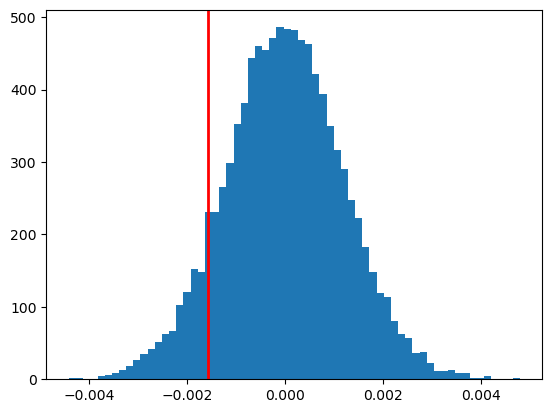

In [33]:
# Plot null sampling distribution
plt.hist(p_diffs, bins = "auto")

# Plot line for observed statistic
plt.axvline(x = obs_diff, color = 'r', linewidth = 2)

***   
**j**. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
(p_diffs > obs_diff).mean()

0.9042

***   
**k**. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANSWER**  
What was just computed is the proportion of differences (between the treatment and the control conversion rates) in the sampling distribution (as simulated under the null hypothesis) that are greater than (i.e., more extreme than) the observed difference.  In statistics, this is called the **p-value**.  Assuming a significance level of 0.05 as is common, a p-value < 0.05 would warrant rejecting the null hypothesis, $H_0$.  In this case, since the calculated p-value is so large, the conclusion of this hypothesis test is certainly to 'fail to reject' the null hypothesis.  Thus, we are warranted in concluding that our test found no statistically significant difference in the conversion rates between the new and old pages.

***   
**l**. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

***   
**m**. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
count=[convert_new, convert_old]
nobs=[n_new, n_old]
zstat, pvalue = sm.stats.proportions_ztest(count, nobs, value=0, alternative='larger')
print('The computed z-score is: {}'.format(zstat))
print('The computed p-value is: {}'.format(pvalue))

The computed z-score is: -1.3109241984234394
The computed p-value is: 0.9050583127590245


***   
**n**. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**ANSWER**    
The z-score tells us that the difference of the proportions for the new and old pages is 1.3 standard deviations below the null hypothesis difference of 0.  This corresponds to a one-sided p-value of 0.9051, a value very close to what was obtained by simulation.  Both values are much greater than the standard significance level of 0.05 and so indicate that the null hypothesis should not be rejected.  The conversion rate with the new page has not demonstrated a statistically significant improvement.

<a id='regression'></a>
### Part III - A Regression Approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

***   
**a**. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**ANSWER**   
Logistic Regression

***   
**b**. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df3 = df2.join(pd.get_dummies(df2['group']))    # Add dummy variables for group
df3['intercept'] = 1     # Add intercept

In [38]:
# Clean up columns
df3.drop(columns=['control'], inplace=True)
df3.rename(columns= {'treatment': 'ab_page'}, inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


***   
**c**. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
mod1 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])   # Instantiate the model
result1 = mod1.fit()       # Fit the model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


***   
**d**. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:               8.077e-06
Time:                        14:39:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -1.9888 - 0.0150\times \text{ab_page}$   
where $\text{ab_page}$ is the binary indicator variable that takes the value 1 when the treatment is present and the value 0 when the control is present.  Where $ \frac{p_i}{1 - p_i} $ is the odds of converting given $\text{ab_page}$, the odds ratio is   
$\text{Odds Ratio} = \frac{\text{Odds given ab_page = 1}}{\text{Odds given ab_page = 0}}$.   
It can be shown that   
$\text{Odds Ratio} = exp(\text{coeff. of ab_page})$     
so that in this case the odds ratio is $exp(-0.0150) = 0.9851$ which indicates that we expect a multiplicative change of 0.9851 in the odds when the treatment is present as opposed to the control.  In other words, the model predicts a slight decrease in the odds of conversion when the treatment is present.

***    
**e**. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**ANSWER**   
The z-score associated with **ab_page** in the regression model is -1.311 which is the same as was found by computation using `stats.proportions_ztest`.  However, the p-value obtained is 0.190, a value very different from the value 0.9051 obtained previously by computation.  The explanation for this discrepancy is located in the fact that the previously calculated p-value was from a one-sided hypothesis test (P > z) corresponding to the pair of hypotheses 
$H_0 : p_{new} - p_{old} \leq 0$ and $H_A : p_{new} - p_{old} > 0$.

In the regression model, the p-value obtained is for a two-sided test (P > |z|) which would correspond to the following set of hypotheses: $H_0 : p_{new} - p_{old} = 0$ and $H_A : p_{new} - p_{old} \neq 0$.  Dividing the regression model p-value by 2 (to obtain the amount for one tail rather than two) and then subtracting from 1 results in what the regression model would give for the one-sided score: 1 - 0.190/2 = 0.905. This resulting one-sided p-value is consistent with what was obtained earlier.

***   
**f**. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANSWER**   
There may be other things besides the landing page that influence whether or not an individual converts.  For example, characteristics such as gender, age, country, linguistic ability, time of day, or day of the week might make a difference to conversion.  Adding other factors to the regression model can be a way of seeing whether these other factors make a significant difference.  On the other hand, more terms in the regression model make it more complicated (possibly penalizing the adjusted R-squared score) and they introduce the possibility that some of the variables may be correlated and, hence, collinear -- a situation to be avoided.

***    
**g**. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
# Create new df
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
# Create dummy variables for country
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
# Create a model with country variables as predictors
mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])   # Instantiate the model
result2 = mod2.fit()       # Fit the model
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:               1.521e-05
Time:                        14:39:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -2.0375 \ \ +\ \  0.0507 \times \text{UK} \ \ +\ \  0.0408 \times \text{US}$   
where $\text{UK}$ and $\text{US}$ are binary indicator variables that indicate the country of the user.  The reference, or baseline, when both of these variables take the value of 0 is $\text{CA}$.

From this model, we expect then a multiplicative change in the odds of converting for a user from the UK, as compared to the baseline of a user from CA, of $exp(0.0507) = 1.0520$.  Similarly, we expect a multiplicative change in the odds of converting for a user from the US, as compared to the baseline of a user from CA, of $exp(0.0408) = 1.0416$.  Both of these represent small increases in the odds of conversion as compared with the baseline.

In [44]:
# Create model with page and country variables as predictors
mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])   # Instantiate the model
result3 = mod3.fit()       # Fit the model
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:               2.323e-05
Time:                        14:39:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -2.0300 \ \ -\ \  0.0149 \times \text{ab_page} \ \ +\ \  0.0506 \times \text{UK} \ \ +\ \  0.0408 \times \text{US}$   
where $\text{ab_page}$, $\text{UK}$, and $\text{US}$ are binary indicator variables as described previously.  The reference, or baseline, when all of these variables take the value of 0 is a user in the control group from CA.

Notice that the coefficients of the page and country variables have not changed much from the previous models that considered page and country of the user separately which suggests their independence from one another as variables.

We noted previously that the p-values for the variables are calculated for a two-sided test in the results.  The z-score helps in deciding how to convert the tabulated p-values into those for a one-sided test.  For ab_page we obtain (as shown previously) a one-side p-value of 1 - 0.191/2 = 0.9045.  The one-sided p-values for the country variables UK and US can be obtained by halving the tabulated values resulting in 0.074/2 = 0.037 and 0.130/2 = 0.065, respectively.  The first meets the 0.05 criterion but the other doesn't.  Although one could consider just keeping the UK variable, the p-value for the US variable is not much greater than 0.05 (an arbitrary cutoff to begin with) and it would be natural to keep it in the model alongside the UK variable as jointly indicating the country of the user.

The following table of exponentiated variable coefficients indicates the multiplicative changes we can expect in the odds of conversion, according to the model, as a result of that particular variable being "turned on" (i.e., acquiring a value of 1) with respect to the baseline.

In [45]:
np.exp(result3.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

***   
**h**. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
# Create interaction variables for ab_page with UK and US
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,ab_UK,ab_US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [47]:
# Create model with page variable, country variables, and interaction variables
mod4 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'ab_UK', 'ab_US']])   # Instantiate the model
result4 = mod4.fit()       # Fit the model
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:               3.482e-05
Time:                        14:39:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Interpretation**    
The resulting logistic model is:   
$log_e \Big( \frac{p_i}{1 - p_i} \Big) = -2.0040 \ \ -\ \  0.0674 \times \text{ab_page} \ \ +\ \  0.0118 \times \text{UK} \ \ +\ \  0.0175 \times \text{US} \ \ +\ \ 0.0783 \times \text{ab_UK} \ \ +\ \ 0.0469 \times \text{ab_US}$   
where $\text{ab_page}$, $\text{UK}$, and $\text{US}$ are binary indicator variables as described previously.  The variables $\text{ab_UK}$ and $\text{ab_US}$ are interaction variables indicating the interaction of $\text{ab_page}$ with $\text{UK}$ and $\text{US}$, respectively.

The addition of the two interaction terms has had the effect of changing the coefficients on the other variables dramatically, probably due to their dependence on the other variables.  The added interaction terms are not themselves statistically significant with one-sided p-values of 0.084 (= 0.168/2) and 0.1915 (= 0.383/2). Moreover, the single-sided p-values for UK and US (0.767/2 = 0.3835 and 0.642/2 = 0.321) are no longer close to being statistically significant now.  The interaction terms do not seem to result in a better model.

<a id='conclusions'></a>
## Conclusions

In this project, an A/B test was performed to analyze the results for an e-commerce website in which roughly half of the website users were presented with a new web page and the other half, the old one.  Those presented with the new page were considered the treatment group and those presented with the old page were considerd the control group.  The initial data set consisted of 294,478 rows; however, it required cleaning from mismatches and duplicates resulting in 290,584 rows.  After cleaning, the A/B test was performed in three ways: (1) using simulation to create a sampling distribution in order to calculate the p-value, (2) using a built-in function to calculate the p-value, and (3) using logistic regression. The alternative hypothesis was that the conversion rate for the new page was greater than the old page, and the null hypothesis was that the new page resulted in the same, or a lower, rate of conversion.  The observed conversion rate for the new page was 11.88% and the rate for the old page was 12.04%.  So, the old page slightly out-performed the new page.  Because observed discrepancies can be due to chance, the hypothesis test was performed.  All three methods resulted in a p-value of about 0.9 which is much greater than the standard significance level of 0.05 used in hypothesis testing.  The conclusion to draw from this is that the new page did not result in a higher conversion rate than the old page.  In the regression analysis, it was also observed that the country of the user had some impact on conversion with slight increases in conversion for users from the UK and the US as compared with CA.  This may be something to investigate when designing a new web page.
